## Factor de crecimiento covid 19 Andalucía

In [1]:
# Detalle de una provincia
c_provincia = 'Córdoba'

# Tamaño de los gráficos
c_figsize = (15,5)

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Config
c_url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
# Frecuencia en días
c_freq = 3
# Periodos
c_periods = 10

In [4]:
# Load csv 
df = pd.read_csv(c_url, thousands='.')

In [5]:
# Preprocessing
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [6]:
# dfV: Registros con los valores acumulados cada x días
fFechas = pd.date_range(end=last_fecha, freq= str(c_freq) + 'D', periods=c_periods+1)
filtro = df['Fecha'].isin(fFechas)
dfV = df[filtro].copy()

# Indices
dfV.set_index(['Provincia', 'Fecha'], inplace=True)
dfV.sort_index(level=['Provincia', 'Fecha'], inplace=True)

## Variación ingresos hospitalarios en Andalucía

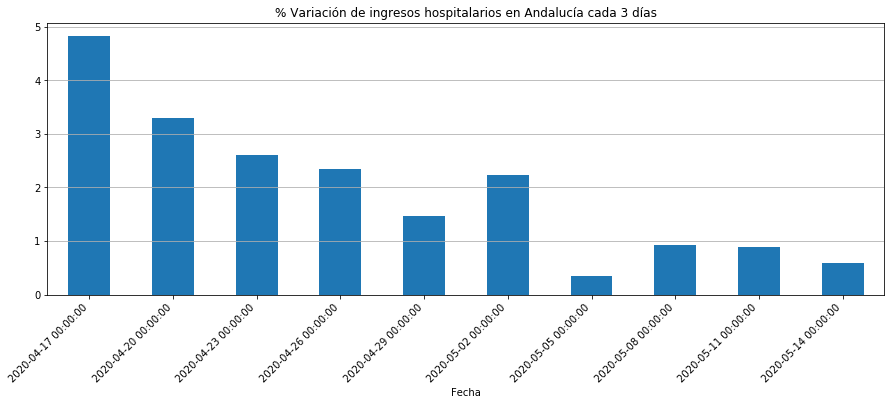

In [7]:
# dfG: Variación en porcentaje con respecto al registro anterior
dfG = dfV.groupby(level='Provincia').pct_change()*100
dfG.dropna(how='all', inplace=True)
titulo = '% Variación de ingresos hospitalarios en Andalucía cada ' + str(c_freq) + ' días'
dfG.loc['Total']['Hospitalización'].plot(title=titulo, kind='bar', figsize=c_figsize).grid(axis='y')
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

## Detalle de una provincia

In [8]:
# Seleccionar los datos a partir del Dataframe original
fFechas = pd.date_range(start=df['Fecha'].min(), end=df['Fecha'].max(), freq=str(c_freq) + 'D')
filtro = df['Fecha'].isin(fFechas)
dfV0 = df[filtro].copy()

# Borrar columnas sobrantes
#dfV0.drop(['Çurados', 'Fallecimientos'], axis='columns', inplace=True)

# Indices
dfV0.set_index(['Provincia', 'Fecha'], inplace=True)
dfV0.sort_index(level=['Provincia', 'Fecha'], inplace=True)

# Calcular los nuevos casos de cada rango. 
dfV0['Nuevos'] = dfV0['Hospitalización'].diff()

# Borrar el primer día ya que no tiene anteriores
dfV0.drop(df['Fecha'].min(), level='Fecha', inplace=True)

# Los negativos ponerlos a 0
dfV0[slice(None)][dfV0['Nuevos'] < 0] = 0

# Borrar la fila de Total
dfV0.drop(index='Total', level='Provincia', inplace=True)

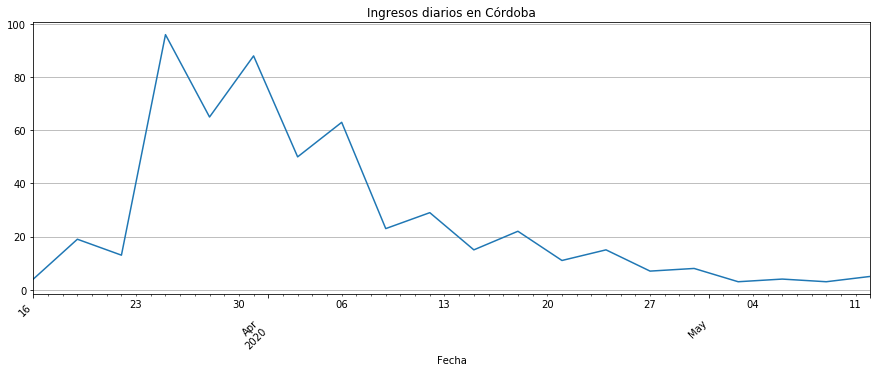

In [9]:
dfV0.loc[c_provincia]['Nuevos'].plot(title='Ingresos diarios en ' + c_provincia, figsize=c_figsize).grid(axis='y')
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

In [10]:
titulo = 'Nuevos casos en ' + c_provincia + ' en los ' + str(c_freq) + ' días anteriores'
print(titulo)
print(dfV0.loc[c_provincia]['Nuevos'])

Nuevos casos en Córdoba en los 3 días anteriores
Fecha
2020-03-16     4.0
2020-03-19    19.0
2020-03-22    13.0
2020-03-25    96.0
2020-03-28    65.0
2020-03-31    88.0
2020-04-03    50.0
2020-04-06    63.0
2020-04-09    23.0
2020-04-12    29.0
2020-04-15    15.0
2020-04-18    22.0
2020-04-21    11.0
2020-04-24    15.0
2020-04-27     7.0
2020-04-30     8.0
2020-05-03     3.0
2020-05-06     4.0
2020-05-09     3.0
2020-05-12     5.0
Name: Nuevos, dtype: float64


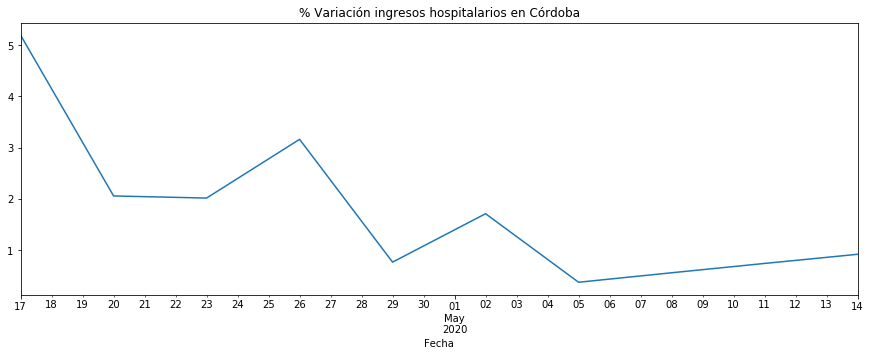

In [11]:
dfG.loc[c_provincia]['Hospitalización'].plot(title='% Variación ingresos hospitalarios en ' + c_provincia, figsize=c_figsize)
plt.show()

### Últimos 10 días

In [12]:
c_last = 10
data = df.set_index(['Provincia', 'Fecha']).loc[c_provincia][['Hospitalización', 'Curados', 'Fallecimientos']].diff().tail(c_last).copy()
titulo = 'Nuevos casos en los últimos ' + str(c_last) + ' días en ' + c_provincia

Nuevos casos en los últimos 10 días en Córdoba. (Nuevos ingresos hospitalarios)


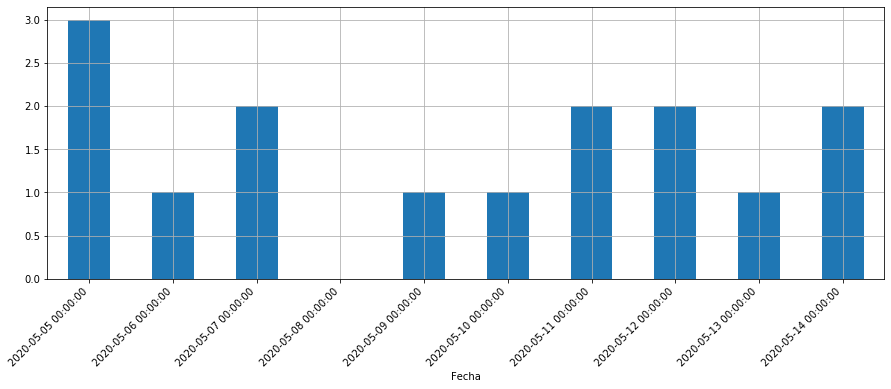

In [13]:
print(titulo + '. (Nuevos ingresos hospitalarios)')
data['Hospitalización'].plot(kind='bar', grid=True, figsize=c_figsize)
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()

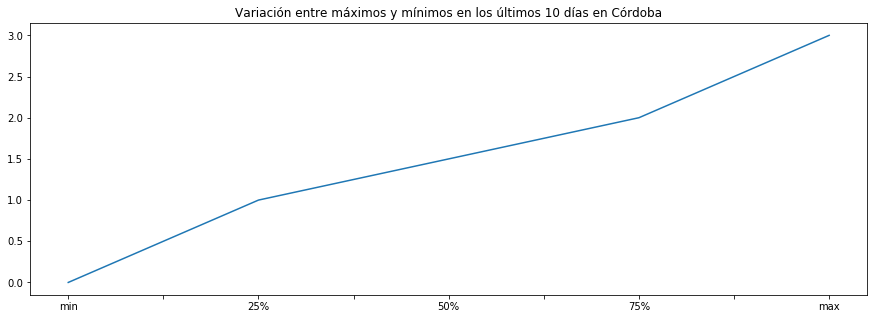

In [14]:
titulo = 'Variación entre máximos y mínimos en los últimos ' + str(c_last) + ' días en ' + c_provincia
data['Hospitalización'].describe().loc['min':'max'].plot(title=titulo, figsize=c_figsize)
plt.show()

In [15]:
print(titulo)
data.describe()

Variación entre máximos y mínimos en los últimos 10 días en Córdoba


,Hospitalización,Curados,Fallecimientos
count,10.000000,10.000000,10.000000
mean,1.500000,35.600000,0.400000
std,0.849837,42.314169,0.516398
min,0.000000,-1.000000,0.000000
25%,1.000000,5.750000,0.000000
50%,1.500000,20.500000,0.000000
75%,2.000000,59.000000,1.000000
max,3.000000,132.000000,1.000000


In [16]:
print(titulo)
print(data)

Variación entre máximos y mínimos en los últimos 10 días en Córdoba
            Hospitalización  Curados  Fallecimientos
Fecha                                               
2020-05-05              3.0      0.0             1.0
2020-05-06              1.0      8.0             0.0
2020-05-07              2.0     67.0             1.0
2020-05-08              0.0     66.0             1.0
2020-05-09              1.0     12.0             0.0
2020-05-10              1.0     38.0             0.0
2020-05-11              2.0      5.0             0.0
2020-05-12              2.0     -1.0             0.0
2020-05-13              1.0     29.0             1.0
2020-05-14              2.0    132.0             0.0
